# Computing year-over-year, sales revenue weighted WAC price percent changes for each drug per month

In [2]:
# Importing basic libraries
import pandas as pd
import numpy as np
import time
import datetime

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
plt.style.use('fivethirtyeight')
from tqdm import tqdm

### Loading the clean dataset

In [3]:
# Loading the dataset
df = pd.read_csv('drugs_pct_changes_monthly.csv')

print("Shape: ", df.shape)
df.head()

Shape:  (242939, 19)


,NDC,Manufacturer,Product,Product Launch Date,Estimated LOE Date,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,Date,Year,Month,TRx,Previous_TRx,TRx_cumulative,WAC,Pct_change,Changed
0,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2014_10,2014,10,0,NaN,0.0,244.16,NaN,0
1,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2014_11,2014,11,6,0.0,6.0,244.16,0.0,0
2,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2014_12,2014,12,22,6.0,28.0,244.16,0.0,0
3,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_01,2015,1,21,22.0,21.0,244.16,0.0,0
4,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_02,2015,2,15,21.0,36.0,244.16,0.0,0


### 1. Year-of-Year Percent Change for all NDCs (WARNING TAKES 30 MINUTES TO RUN)

In [10]:
# Sorting values
df_yy = df.sort_values(['Month', 'Year'])

# List of unique NDCs 
NDCs = df.NDC.unique()

# Empty Dataframe to store new concat. data
df_pct_yy = pd.DataFrame(columns=df.columns)
df_pct_yy['Pct_change_y/y'] = None 

# Empty Dataframe to store new data for NDC level calculations
df_pct_yy_m = pd.DataFrame(columns=df_yy.columns)
df_pct_yy_m['Pct_change_y/y'] = None 

# For each drug, compute pct change and append to dataframe
for NDC in tqdm(NDCs):
    df_temp1 = df_yy[df_yy.NDC == NDC].copy()
    
    for num in range(1, 13):
        df_temp2 = df_temp1[df_temp1.Month == num].copy()
        df_temp2['Pct_change_y/y'] = df_temp2.WAC.pct_change()
        df_pct_yy_m = pd.concat((df_pct_yy_m, df_temp2))
       
    df_pct_yy = pd.concat((df_pct_yy, df_pct_yy_m))
    df_pct_yy_m = pd.DataFrame(columns=df_yy.columns)
    df_pct_yy_m['Pct_change_y/y'] = None

print("Shape: ", df_pct_yy.shape)
df_pct_yy.head()

100%|██████████| 4633/4633 [32:37<00:00,  1.76it/s]


Shape:  (242939, 20)


,NDC,Manufacturer,Product,Product Launch Date,Estimated LOE Date,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,Date,Year,Month,TRx,Previous_TRx,TRx_cumulative,WAC,Pct_change,Changed,Pct_change_y/y
3,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2015_01,2015,1,21,22.0,21.0,244.16,0.0,0,NaN
15,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2016_01,2016,1,110,79.0,110.0,287.40,0.0,0,0.177097
27,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2017_01,2017,1,132,125.0,132.0,313.00,0.0,0,0.089074
39,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2018_01,2018,1,259,240.0,259.0,338.00,0.0,0,0.079872
51,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,2019_01,2019,1,459,492.0,459.0,365.10,0.0,0,0.080178


### 2. Revenue Weighted, Year-Over-Year WAC Percent Change for Industry

In [11]:
#Calculating monthly sales revenue per drug: WAC Price * TRx volume
df_pct_yy['Revenue'] = df_pct_yy['WAC'] * df_pct_yy['TRx'] 

In [12]:
#Calculating total monthly sales revenue for all drugs
df_pct_yy['Total_revenue'] = df_pct_yy.groupby('Date')['Revenue'].transform('sum')

In [13]:
#Calculating Revenue Weighted Percent Change: need to sum up monthly % changes to see drug market trends
df_pct_yy['Wght_pct_change_y/y'] = df_pct_yy['Pct_change_y/y'] * (df_pct_yy['Revenue'] / df_pct_yy['Total_revenue'])
df_pct_yy.head()


,NDC,Manufacturer,Product,Product Launch Date,Estimated LOE Date,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,...,TRx,Previous_TRx,TRx_cumulative,WAC,Pct_change,Changed,Pct_change_y/y,Revenue,Total_revenue,Wght_pct_change_y/y
3,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,...,21,22.0,21.0,244.16,0.0,0,NaN,5127.36,1.913754e+09,NaN
15,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,...,110,79.0,110.0,287.40,0.0,0,0.177097,31614,2.321833e+09,2.41135e-06
27,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,...,132,125.0,132.0,313.00,0.0,0,0.089074,41316,2.773950e+09,1.3267e-06
39,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,...,259,240.0,259.0,338.00,0.0,0,0.079872,87542,3.405939e+09,2.05294e-06
51,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,...,459,492.0,459.0,365.10,0.0,0,0.080178,167581,4.201433e+09,3.19801e-06


In [ ]:
# Saving dataset
df_pct_yy.to_csv('yearoveryear_WAC_pct_changes_RevWeighted_monthly.csv', index=False)

In [5]:
# Reloading the dataset so can skip the 30 minute data processing
df_pct_yy = pd.read_csv('yearoveryear_WAC_pct_changes_RevWeighted_monthly.csv')

print("Shape: ", df_pct_yy.shape)
df_pct_yy.head()

Shape:  (242939, 23)


,NDC,Manufacturer,Product,Product Launch Date,Estimated LOE Date,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,...,TRx,Previous_TRx,TRx_cumulative,WAC,Pct_change,Changed,Pct_change_y/y,Revenue,Total_revenue,Wght_pct_change_y/y
0,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,...,21,22.0,21.0,244.16,0.0,0,NaN,5127.36,1.913754e+09,NaN
1,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,...,110,79.0,110.0,287.40,0.0,0,0.177097,31614.00,2.321833e+09,0.000002
2,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,...,132,125.0,132.0,313.00,0.0,0,0.089074,41316.00,2.773950e+09,0.000001
3,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,...,259,240.0,259.0,338.00,0.0,0,0.079872,87542.00,3.405939e+09,0.000002
4,2143301,Eli Lilly and Co,TRULICITY 10/2014 LLY,10/1/2014 0:00,Sep-26,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,...,459,492.0,459.0,365.10,0.0,0,0.080178,167580.90,4.201433e+09,0.000003


### 3. Year-Over-Year, Revenue Weighted WAC % Change for Entire Market Table

In [3]:
#Revenue Weighted, Year-over-year WAC percent change for entire market
df_yearoveryear_market = df_pct_yy.groupby('Date')['Wght_pct_change_y/y'].sum().reset_index()

In [4]:
df_yearoveryear_market.head()

,Date,Wght_pct_change_y/y
0,2014_08,0.0
1,2014_09,0.0
2,2014_10,0.0
3,2014_11,0.0
4,2014_12,0.0


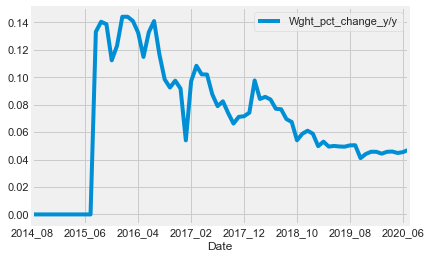

In [5]:
#Graphing weighted average WAC percent change
df_yearoveryear_market.plot(x='Date', y='Wght_pct_change_y/y')

### 4. Revenue Weighted, Year-Over-Year WAC Percent Change by Major Class

In [6]:
# Reload data if needed
df_pct_yy = pd.read_csv('yearoveryear_WAC_pct_changes_RevWeighted_monthly.csv')

In [7]:
print("Shape: ", df_pct_yy.shape)

Shape:  (242939, 23)


In [8]:
# Only NDCs that have full period
last_period = df_pct_yy[(df_pct_yy.Year == 2020) & (df_pct_yy.Month == 7)].NDC.unique()
first_period = df_pct_yy[(df_pct_yy.Year == 2014) & (df_pct_yy.Month == 8)].NDC.unique()
selected_NDC = list(set(last_period).intersection(first_period))
df_pct_yy = df_pct_yy[df_pct_yy.NDC.isin(selected_NDC)]

In [9]:
print("Shape: ", df_pct_yy.shape)

Shape:  (136448, 23)


In [10]:
#Calculating total revenue for EACH MAJOR CLASS for each month
df_pct_yy['Class_revenue'] = df_pct_yy.groupby(['Date','Major Class'])['Revenue'].transform('sum')

In [11]:
df_pct_yy_class = df_pct_yy.sort_values('Class_revenue')
print("Shape: ", df_pct_yy_class.shape)
df_pct_yy_class.head()

Shape:  (136448, 24)


,NDC,Manufacturer,Product,Product Launch Date,Estimated LOE Date,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,...,Previous_TRx,TRx_cumulative,WAC,Pct_change,Changed,Pct_change_y/y,Revenue,Total_revenue,Wght_pct_change_y/y,Class_revenue
148691,42023011625,Par Pharmaceuticals an Endo Company,PITOCIN 11/1987 P.H,11/1/1987 0:00,Unspecified,LABOUR INDUCERS,ACUTE,INJECTABLES,25,1.0,...,18.0,29.0,0.94120,0.0,0,NaN,10.35320,1.855033e+09,NaN,10.35320
56319,68050960,Sanofi U.S. LLC,RIFAMATE 08/1976 S.A,8/1/1976 0:00,May-96,ANTITUBERCULARS,CHRONIC,ORALS,1,60.0,...,0.0,2.0,5.31083,0.0,0,0.0,10.62166,4.836398e+09,0.0,16.14366
201297,59676070101,Janssen Therapeutics,SIRTURO 05/2013 JAN,5/1/2013 0:00,Oct-24,ANTITUBERCULARS,CHRONIC,ORALS,1,188.0,...,0.0,0.0,159.57447,0.0,0,0.0,0.00000,4.836398e+09,0.0,16.14366
56247,68050860,Sanofi U.S. LLC,RIFADIN 04/1982 S.A,4/1/1982 0:00,May-96,ANTITUBERCULARS,CHRONIC,ORALS,1,60.0,...,0.0,0.0,4.60966,0.0,0,0.0,0.00000,4.836398e+09,0.0,16.14366
26973,8411701,Wyeth Pharmaceuticals Inc a subsidiary of Pfi...,TRECATOR 03/2005 PFZ,3/1/2005 0:00,Unspecified,ANTITUBERCULARS,CHRONIC,ORALS,1,100.0,...,4.0,5.0,5.52200,0.0,0,0.0,5.52200,4.836398e+09,0.0,16.14366


In [12]:
# Trim rows with class revenue of zero
df_pct_yy_class_2 = df_pct_yy_class[df_pct_yy_class['Class_revenue']>0]
# Trim rows with Pct_change_y/y of NaN
df_pct_yy_class_2 = df_pct_yy_class_2[df_pct_yy_class_2['Pct_change_y/y'].notna()]
print("Shape: ", df_pct_yy_class_2.shape)
df_pct_yy_class_2.head()

Shape:  (113576, 24)


,NDC,Manufacturer,Product,Product Launch Date,Estimated LOE Date,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,...,Previous_TRx,TRx_cumulative,WAC,Pct_change,Changed,Pct_change_y/y,Revenue,Total_revenue,Wght_pct_change_y/y,Class_revenue
56319,68050960,Sanofi U.S. LLC,RIFAMATE 08/1976 S.A,8/1/1976 0:00,May-96,ANTITUBERCULARS,CHRONIC,ORALS,1,60.0,...,0.0,2.0,5.31083,0.0,0,0.000000,10.62166,4.836398e+09,0.000000e+00,16.14366
201297,59676070101,Janssen Therapeutics,SIRTURO 05/2013 JAN,5/1/2013 0:00,Oct-24,ANTITUBERCULARS,CHRONIC,ORALS,1,188.0,...,0.0,0.0,159.57447,0.0,0,0.000000,0.00000,4.836398e+09,0.000000e+00,16.14366
56247,68050860,Sanofi U.S. LLC,RIFADIN 04/1982 S.A,4/1/1982 0:00,May-96,ANTITUBERCULARS,CHRONIC,ORALS,1,60.0,...,0.0,0.0,4.60966,0.0,0,0.000000,0.00000,4.836398e+09,0.000000e+00,16.14366
26973,8411701,Wyeth Pharmaceuticals Inc a subsidiary of Pfi...,TRECATOR 03/2005 PFZ,3/1/2005 0:00,Unspecified,ANTITUBERCULARS,CHRONIC,ORALS,1,100.0,...,4.0,5.0,5.52200,0.0,0,0.000000,5.52200,4.836398e+09,0.000000e+00,16.14366
148696,42023011625,Par Pharmaceuticals an Endo Company,PITOCIN 11/1987 P.H,11/1/1987 0:00,Unspecified,LABOUR INDUCERS,ACUTE,INJECTABLES,25,1.0,...,10.0,116.0,3.60000,0.0,0,1.142857,21.60000,4.618761e+09,5.344661e-09,21.60000


In [13]:
#Calculating MAJOR CLASS Weighted Percent Change
df_pct_yy_class_2['Class_wght_pct_change_y/y'] = df_pct_yy_class_2['Pct_change_y/y'] * (df_pct_yy_class_2['Revenue'] / df_pct_yy_class_2['Class_revenue'])
df_pct_yy_class_2.head()

,NDC,Manufacturer,Product,Product Launch Date,Estimated LOE Date,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,...,TRx_cumulative,WAC,Pct_change,Changed,Pct_change_y/y,Revenue,Total_revenue,Wght_pct_change_y/y,Class_revenue,Class_wght_pct_change_y/y
56319,68050960,Sanofi U.S. LLC,RIFAMATE 08/1976 S.A,8/1/1976 0:00,May-96,ANTITUBERCULARS,CHRONIC,ORALS,1,60.0,...,2.0,5.31083,0.0,0,0.000000,10.62166,4.836398e+09,0.000000e+00,16.14366,0.000000
201297,59676070101,Janssen Therapeutics,SIRTURO 05/2013 JAN,5/1/2013 0:00,Oct-24,ANTITUBERCULARS,CHRONIC,ORALS,1,188.0,...,0.0,159.57447,0.0,0,0.000000,0.00000,4.836398e+09,0.000000e+00,16.14366,0.000000
56247,68050860,Sanofi U.S. LLC,RIFADIN 04/1982 S.A,4/1/1982 0:00,May-96,ANTITUBERCULARS,CHRONIC,ORALS,1,60.0,...,0.0,4.60966,0.0,0,0.000000,0.00000,4.836398e+09,0.000000e+00,16.14366,0.000000
26973,8411701,Wyeth Pharmaceuticals Inc a subsidiary of Pfi...,TRECATOR 03/2005 PFZ,3/1/2005 0:00,Unspecified,ANTITUBERCULARS,CHRONIC,ORALS,1,100.0,...,5.0,5.52200,0.0,0,0.000000,5.52200,4.836398e+09,0.000000e+00,16.14366,0.000000
148696,42023011625,Par Pharmaceuticals an Endo Company,PITOCIN 11/1987 P.H,11/1/1987 0:00,Unspecified,LABOUR INDUCERS,ACUTE,INJECTABLES,25,1.0,...,116.0,3.60000,0.0,0,1.142857,21.60000,4.618761e+09,5.344661e-09,21.60000,1.142857


In [14]:
#MAJOR CLASS Revenue Weighted, Year-over-year WAC percent change
df_yearoveryear_class = df_pct_yy_class_2.groupby(['Date','Major Class'])['Class_wght_pct_change_y/y'].sum().reset_index()

In [15]:
df_yearoveryear_class.tail()

,Date,Major Class,Class_wght_pct_change_y/y
3889,2020_07,THYROID ANTI-THYROID AND IODINE PREPS,0.045545
3890,2020_07,URINARY INCONTINENCE,0.052705
3891,2020_07,"VACCINES (PURE, COMB, OTHER)",0.051510
3892,2020_07,VIRAL HEPATITIS,0.000141
3893,2020_07,VITAMINS & MINERALS,0.000000


In [16]:
# Saving dataset
df_yearoveryear_class.to_csv('df_yearoveryear_class.csv', index=False)